In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("Bank.xlsx",sheet_name=1)

In [3]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
df1=df.drop(['ID','ZIP Code'],axis=1)

In [5]:
df1.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [6]:
df2=df1.dropna()

In [7]:
df3=df2.drop_duplicates()

In [8]:
df3[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']].mean()

Age                   45.347704
Experience            20.114498
Income                73.824544
Family                 2.396631
CCAvg                  1.940606
Education              1.879286
Mortgage              56.646080
Personal Loan          0.096250
Securities Account     0.104672
CD Account             0.060557
Online                 0.596150
CreditCard             0.294566
dtype: float64

In [9]:
Bankloan_yes=df3[df3["Personal Loan"]==1]

In [10]:
Bankloan_No=df3[df3["Personal Loan"]==0]

In [11]:
Bank_Yes=Bankloan_yes.describe()

In [12]:
Bank_Yes

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,45.066667,19.843750,144.745833,2.612500,3.905347,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,11.590964,11.582443,31.584429,1.115393,2.097679,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,26.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,35.000000,9.000000,122.000000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,45.000000,20.000000,142.500000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,55.000000,30.000000,172.000000,4.000000,5.350000,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,65.000000,41.000000,203.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [13]:
Bank_No=Bankloan_No.describe()

In [14]:
Bank_No

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.0,4507.000000,4507.000000,4507.000000,4507.000000
mean,45.377635,20.143333,66.271356,2.373641,1.731359,1.841580,51.938762,0.0,0.102507,0.035944,0.595074,0.294209
std,11.447784,11.453232,40.606490,1.148610,1.568899,0.839664,92.129496,0.0,0.303348,0.186171,0.490932,0.455737
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,35.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,59.000000,2.000000,1.500000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,84.500000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


(array([ 799., 1150.,  863.,  877.,  376.,  307.,  268.,  197.,  141.,
           9.]),
 array([  8. ,  29.6,  51.2,  72.8,  94.4, 116. , 137.6, 159.2, 180.8,
        202.4, 224. ]),
 <BarContainer object of 10 artists>)

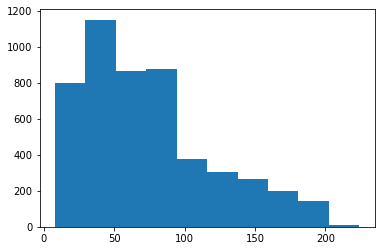

In [15]:
plt.hist(df3.Income)

(array([1674., 1374., 1037.,  319.,  219.,   97.,  132.,   84.,   45.,
           6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

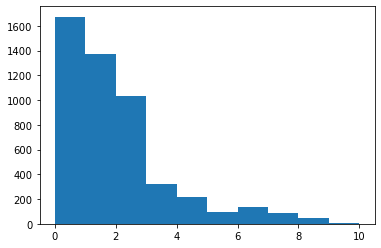

In [16]:
plt.hist(df3.CCAvg)

(array([262., 483., 631., 476., 531., 600., 522., 678., 503., 301.]),
 array([23. , 27.4, 31.8, 36.2, 40.6, 45. , 49.4, 53.8, 58.2, 62.6, 67. ]),
 <BarContainer object of 10 artists>)

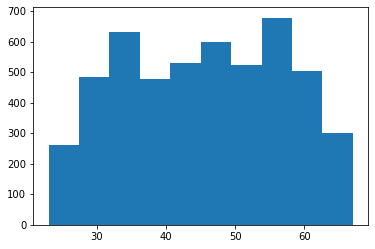

In [17]:
plt.hist(df3.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x169d43d7d30>,
 'caps': [<matplotlib.lines.Line2D at 0x169d43e73d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x169d43d79d0>],
 'medians': [<matplotlib.lines.Line2D at 0x169d43e7a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x169d43e7df0>],
 'means': []}

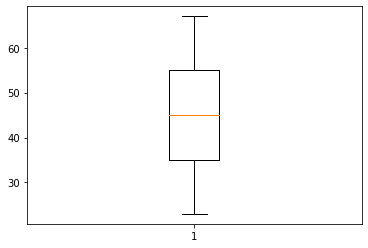

In [18]:
plt.boxplot(df3.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x169d4244880>,
 'caps': [<matplotlib.lines.Line2D at 0x169d4244f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x169d4244520>],
 'medians': [<matplotlib.lines.Line2D at 0x169d4247670>],
 'fliers': [<matplotlib.lines.Line2D at 0x169d42479d0>],
 'means': []}

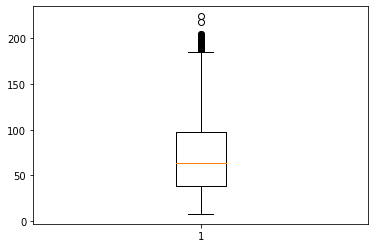

In [19]:
plt.boxplot(df3.Income)

{'whiskers': [<matplotlib.lines.Line2D at 0x169d6e02520>,
 'caps': [<matplotlib.lines.Line2D at 0x169d6e02be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x169d6e021c0>],
 'medians': [<matplotlib.lines.Line2D at 0x169d6d282e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x169d6d28640>],
 'means': []}

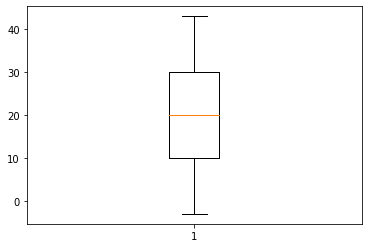

In [20]:
plt.boxplot(df3.Experience)

In [23]:
df3["Income"].skew()

0.839703974295327

In [25]:
stats,p=ttest_ind(Bankloan_yes,Bankloan_No.Age)

In [26]:
print(stats,p)

[ -0.56508604 -46.40309718 141.37292902 -81.79581427 -79.22177589
 -82.54366591  22.63758446 -84.92282079 -86.59340667 -86.27107235
 -85.66800569 -86.25902319] [5.72040669e-001 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 4.40439814e-108 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]


In [29]:
stats,p=ttest_ind(Bankloan_No.Experience,Bankloan_yes.Experience)

In [30]:
print(stats,p)

0.5442022148074946 0.5863266672510148


In [31]:
stats,p=ttest_ind(Bankloan_No.Income,Bankloan_yes.Income)

In [32]:
print(stats,p)

-41.037412879663336 0.0


In [36]:
stats,p=mannwhitneyu(Bankloan_yes.Mortgage,Bankloan_No.Mortgage)

In [37]:
print(stats,p)

972786.5 4.51906558129392e-06


In [38]:
stats,p=mannwhitneyu(Bankloan_yes.CCAvg,Bankloan_No.CCAvg)

In [39]:
print(stats,p)

417018.0 3.0727196394025045e-109


In [42]:
chitable=pd.crosstab(df3["Personal Loan"],df3["Education"])

In [43]:
chitable

Education,1,2,3
Personal Loan,,,
0,2002,1217,1288
1,93,182,205


In [44]:
stats,p,dof,expected=chi2_contingency(chitable)

In [45]:
print(stats,p)

112.12380323466421 4.493921507384509e-25


In [46]:
chitable=pd.crosstab(df3["Securities Account"],df3["Securities Account"])

In [47]:
chitable

Securities Account,0,1
Securities Account,,
0,4465,0
1,0,522


In [49]:
chitable=pd.crosstab(df3["Personal Loan"],df3["Securities Account"])

In [50]:
chitable

Securities Account,0,1
Personal Loan,,
0,4045,462
1,420,60


In [51]:
stats,p,dof,expected=chi2_contingency(chitable)

In [52]:
print(stats,p)

2.1080092303922933 0.1465298319948713


In [54]:
stats,p=pearsonr(df3["Personal Loan"],df3["Age"])

In [55]:
print(stats,p)

-0.008003281471975349 0.5720406692719532


In [56]:
stats,p=pearsonr(df3["Personal Loan"],df3["Experience"])

In [57]:
print(stats,p)

-0.007707522894151847 0.586326667253083


In [58]:
stats,p=pearsonr(df3["Personal Loan"],df3["Income"])

In [59]:
print(stats,p)

0.5025130678174459 1.993056e-317


In [60]:
stats,p=pearsonr(df3["Personal Loan"],df3["Education"])

In [61]:
print(stats,p)

0.13761779930017948 1.6319126552640622e-22


In [62]:
stats,p=pearsonr(df3["Personal Loan"],df3["Mortgage"])

In [63]:
print(stats,p)

0.14169994211956266 8.738439959264904e-24


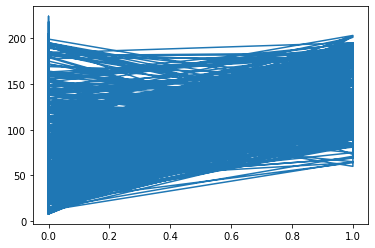

In [64]:
plt.plot(df3["Personal Loan"],df3["Income"])

In [66]:
df3.corr()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994221,-0.056897,-0.045533,-0.052540,0.042356,-0.013014,-0.008003,-0.000715,0.007849,0.013989,0.006381
Experience,0.994221,1.000000,-0.048277,-0.051718,-0.050610,0.014166,-0.011083,-0.007708,-0.001529,0.010151,0.014245,0.007628
Income,-0.056897,-0.048277,1.000000,-0.157922,0.646073,-0.186847,0.206420,0.502513,-0.002992,0.169589,0.014646,-0.003479
Family,-0.045533,-0.051718,-0.157922,1.000000,-0.109812,0.066145,-0.020595,0.061398,0.019957,0.014081,0.009907,0.012018
CCAvg,-0.052540,-0.050610,0.646073,-0.109812,1.000000,-0.135299,0.109166,0.366672,0.014573,0.136244,-0.002727,-0.007404
Education,0.042356,0.014166,-0.186847,0.066145,-0.135299,1.000000,-0.032256,0.137618,-0.010132,0.014475,-0.015633,-0.010307
Mortgage,-0.013014,-0.011083,0.206420,-0.020595,0.109166,-0.032256,1.000000,0.141700,-0.005909,0.088987,-0.005266,-0.007930
Personal Loan,-0.008003,-0.007708,0.502513,0.061398,0.366672,0.137618,0.141700,1.000000,0.021670,0.316210,0.006718,0.002399
Securities Account,-0.000715,-0.001529,-0.002992,0.019957,0.014573,-0.010132,-0.005909,0.021670,1.000000,0.316883,0.013096,-0.015466
CD Account,0.007849,0.010151,0.169589,0.014081,0.136244,0.014475,0.088987,0.316210,0.316883,1.000000,0.176414,0.278559


In [67]:
import statsmodels.api as sm

In [68]:
Y=df3["Personal Loan"]

In [70]:
X=df3[['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]

In [77]:
X1=sm.add_constant(X)

In [80]:
Logistic=sm.Logit(Y,X)

In [81]:
result=Logistic.fit()

         Current function value: 0.000000
         Iterations: 35


C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [82]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 4987
Model:                          Logit   Df Residuals:                     4975
Method:                           MLE   Df Model:                           11
Date:                Sat, 19 Jun 2021   Pseudo R-squ.:                   1.000
Time:                        22:29:56   Log-Likelihood:            -2.4087e-06
converged:                      False   LL-Null:                       -1579.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -1.8242    797.685     -0.002      0.998   -1565.258    1561.610
Experience             1.7824    792.922      0.002      0.998   -1552.316    1555.881
Income                 0.0140     33.029      0.000      1.000     -64.722      64.750
Family                 0.2040    690.862      0.000      1.000   -1353.860    1354.268
CCAvg                  0.5617    641.046      0.001      0.999   -1255.864    1256.988
Education              5.7301   6070.568      0.001      0.999   -1.19e+04    1.19e+04
Mortgage               0.0049      6.615      0.001      0.999     -12.960      12.970
Personal Loan         55.2827    1.4e+04      0.004      0.997   -2.74e+04    2.75e+04
Securities Account    -0.6248   6191.619     -0.000      1.000   -1.21e+04    1.21e+04
CD Account            -2.4252   6174.808     -0.000      1.000   -1.21e+04    1.21e+04
Online                 4.7035   4982.605      0.001      0.999   -9761.023    9770.429
CreditCard             3.0432   2255.697      0.001      0.999   -4418.041    4424.128
======================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""